# Mapeos en 2D: Modelos Poblacionales


## Modelo de Competencia

## Modelo Presa-Depredador

El modelo presentado aquí es el propuesto por Neubert y Kot, este es fácilmente derivable del modelo del tipo Lotka-Volterra

$$
\dfrac{dN}{dt} = \bigg(1 - \dfrac{N}{K}\bigg)rN - eNP\\
\dfrac{dP}{dt} = bNP - dP
$$

Para obtener el modelo discreto basta aproximar las derivadas mediante

$$
\dfrac{df}{dt}\approx\dfrac{f(x+h)-f(x)}{h}
$$

Tomando pasos discretos, esto es $h=1$, se obtienen las ecuaciones deseadas

$$
N_{t+1} = N_t + rN_t\bigg(1 - \dfrac{N_t}{K}\bigg)-eN_tP_t\\
P_{t+1}=bN_tP_t+\bigg(1-d\bigg)P_t
$$

En donde

$$
N_t:\text{La densidad de las presas al tiempo $t$}\\
P_t:\text{La densidad de depredadores al tiempo $t$}\\
\text{Presa}\begin{cases}
r:&\text{Tasa de crecimiento}\\
K:&\text{Capacidad de carga}\\
\end{cases}\\
\text{Depredador}\begin{cases}
e:\text{Eficiencia ...}\\
b:\text{Tasa de natalidad}\\
d:\text{Tasa de mortalidad}
\end{cases}
$$

Los puntos de equilibrio del sistema reducido son

$$
X^0 =(0, 0)\\
X^1=(1, 0)\\
X^*=\bigg(\dfrac{1}{c}, \dfrac{r(c-1)}{c^2}\bigg)
$$

Con eigenvalores

$$
\lambda_1^0=r+1, \lambda_2^0=0\\
\lambda_1^1=1-r, \lambda_2^1=c\\
\lambda^*_{1,2}=1-\dfrac{1}{2c}\bigg\{r\pm[r^2+4rc(1-c)]^{1/2}\bigg\}
$$

El punto que es interesante analizar es $X^*$ puesto que corresponde al punto de equilibrio en que ambas poblaciones pueden coexistir.

In [1]:
using Plots; pyplot()
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
include("utilidades.jl")

genera_diagrama (generic function with 1 method)

In [3]:
function lotka_volterra(A::Vector, r::Float64, c::Float64)
    x = A[1]; y = A[2]
    return [(r + 1) * x - r*x^2 - c*x*y, c*x*y]
end

lotka_volterra (generic function with 1 method)

In [4]:
X_f(c, r) = [1 / c, r * (c-1) / c^2]

X_f (generic function with 1 method)

La región de interés en el espacio de parámetros es la siguiente

In [5]:
rango_c = 1:0.01:2
p = plot(rango_c, x -> 4*x / (3 - x), legend=false, fill=(0, 0.5, :blue), c="blue", alpha=0.3)
xlims!(0, 3)
ylims!(0, 8)
xlabel!("c"); ylabel!("r")
annotate!(0.8, 1, "T")
annotate!(1.2, 4, "DP")
annotate!(2.2, 2, "H")
savefig(p, "region_estable.png");

![](./region_estable.png)

In [6]:
function itera_mapeo(F::Function, params::Vector; n::Int=100)
    X0, r, c = params
    X = X0
    iterados_x = [X[1]]
    iterados_y = [X[2]]
    for _ in 1:n
        X = F(X, r, c)
        push!(iterados_x, X[1])
        push!(iterados_y, X[2])
    end
    return iterados_x, iterados_y
end

itera_mapeo (generic function with 1 method)

Veamos el comportamiento de unos cuantos puntos en este intervalo estable.

In [7]:
# Tomamos algunos valores dentro de la región estable
r = 1.5
c = 1.5
X0 = [.5, .2]
iters_x, iters_y = itera_mapeo(lotka_volterra, [X0, r, c], n=40);

In [8]:
#anim = @animate for i in 1:length(iters_x)
#    scatter([iters_x[i]], [iters_y[i]], label="")
#    if i != 1 plot!([iters_x[1:i]], [iters_y[1:i]], label="Trayectoria") end
#    xlims!(0, 1); ylims!(0, 1)
#end

#gif(anim, "tmp.gif", fps=5)

Veamos que pasa tras cruzar cada frontera de la región estable.

In [9]:
c = 1.1
rango_r = 0:0.0001:3
X0 = [.5, .2]
mapeos = [itera_mapeo(lotka_volterra, [X0, r, c]) for r in rango_r];

In [10]:
mapeos_x = [m[1] for m in mapeos]
mapeos_y = [m[2] for m in mapeos];

In [11]:
pts_x = [m[end-9:end] for m in mapeos_x]
pts_y = [m[end-9:end] for m in mapeos_y];

In [12]:
r_vals = []
for r in rango_r
    for _ in 1:10
        push!(r_vals, r)
    end
end

In [13]:
px = []
for pt in pts_x
    for p in pt
        push!(px, p)
    end
end

In [14]:
py = []
for pt in pts_y
    for p in pt
        push!(py, p)
    end
end

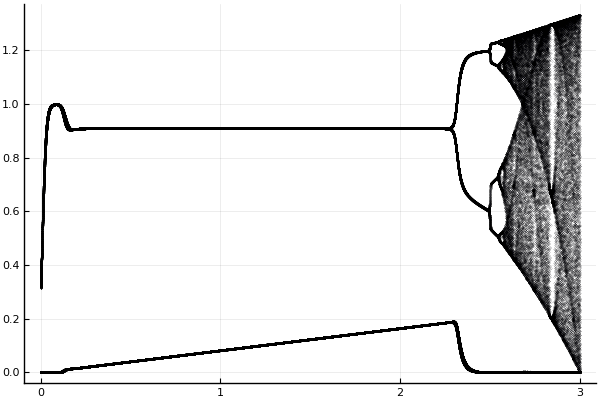

In [15]:
scatter(r_vals, px, ms=0.1, label="", c=:blue, alpha=0.4)
scatter!(r_vals, py, ms=0.1, label="", c=:green, alpha=0.4)

In [16]:
r = 3.1
rango_c = 1.9:0.00001:2.4
X0 = [.1, .1]
mapeos = [itera_mapeo(lotka_volterra, [X0, r, c]) for c in rango_c];

In [17]:
mapeos_x = [m[1] for m in mapeos]
mapeos_y = [m[2] for m in mapeos];

pts_x = [m[end-39:end] for m in mapeos_x]
pts_y = [m[end-39:end] for m in mapeos_y];

c_vals = []
for c in rango_c
    for _ in 1:40
        push!(c_vals, c)
    end
end

px = []
for pt in pts_x
    for p in pt
        push!(px, p)
    end
end

py = []
for pt in pts_y
    for p in pt
        push!(py, p)
    end
end

In [18]:
##scatter(c_vals, px, ms=0.1, label="", alpha=0.4)
#p = scatter(c_vals, px, ms=0.05, label="", alpha=0.4, dpi=300)
#xlabel!("c")
#ylabel!("Presa")
#savefig(p, "hopf_presa.png")

![](hopf_presa.png)

In [19]:
X0 = [0.7640, 0.44423]
r = 2.8572
c = 1.25
iters_x, iters_y = itera_mapeo(lotka_volterra, [X0, r, c], n=50_000);

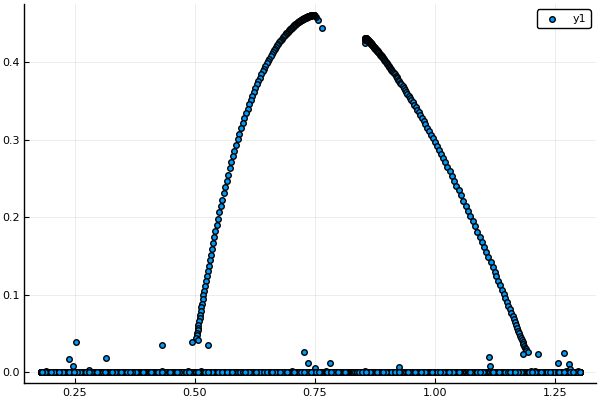

In [20]:
scatter(iters_x, iters_y)